In [48]:
# Install required libraries
!pip install pandas numpy nltk spacy matplotlib seaborn

# Download NLTK stop words and spaCy English model
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import spacy
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 81.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [49]:
import pandas as pd


# Assume the file is named 'reddit_data.csv'
df = pd.read_csv('/content/myositis_reddit_data_with_parent_comments.csv')

# Display the first few rows of the dataset
df.head()


,post_title,post_content,post_upvotes,post_comments_count,post_created_utc,post_author,subreddit,keyword,post_url,comment_id,comment_author,comment_content,comment_upvotes,comment_created_utc,comment_depth,parent_comment_id
0,What was your first symptom?,In May I got rhabdomyolisis (CK: 6500<) after ...,3,7,2024-07-11 22:35:35,FancyBlackDressdGirl,Myositis,myositis,https://www.reddit.com/r/Myositis/comments/1e1...,lcr5yqf,erudesa,My first symptoms were progressive weakness an...,3,2024-07-11 23:30:44,0,NaN
1,What was your first symptom?,In May I got rhabdomyolisis (CK: 6500<) after ...,3,7,2024-07-11 22:35:35,FancyBlackDressdGirl,Myositis,myositis,https://www.reddit.com/r/Myositis/comments/1e1...,lct42w2,FancyBlackDressdGirl,Thank you so much. Wish you the best ❤,2,2024-07-12 09:01:06,1,lcr5yqf
2,What was your first symptom?,In May I got rhabdomyolisis (CK: 6500<) after ...,3,7,2024-07-11 22:35:35,FancyBlackDressdGirl,Myositis,myositis,https://www.reddit.com/r/Myositis/comments/1e1...,lcs7tad,ishiewishy,Mine was a lot of pain getting up from sitting...,3,2024-07-12 03:45:02,0,NaN
3,What was your first symptom?,In May I got rhabdomyolisis (CK: 6500<) after ...,3,7,2024-07-11 22:35:35,FancyBlackDressdGirl,Myositis,myositis,https://www.reddit.com/r/Myositis/comments/1e1...,lcw5jtj,AK032016,"Severe gastrointenstinal issues, breathing mus...",3,2024-07-12 20:40:26,0,NaN
4,What was your first symptom?,In May I got rhabdomyolisis (CK: 6500<) after ...,3,7,2024-07-11 22:35:35,FancyBlackDressdGirl,Myositis,myositis,https://www.reddit.com/r/Myositis/comments/1e1...,lcxhwxm,Overall-Fine,Progressive muscle weakness. First big episod...,1,2024-07-13 01:48:40,0,NaN


In [50]:
# Drop duplicate rows
df = df.drop_duplicates()

# Drop rows with missing critical data (e.g., post_content or comment_content)
df = df.dropna(subset=['post_content', 'comment_content'])

# Fill missing values in other columns if needed
df = df.fillna('Unknown')


In [51]:
 import nltk
 nltk.download('punkt_tab')

# Convert text to lowercase
df['post_content'] = df['post_content'].str.lower()
df['comment_content'] = df['comment_content'].str.lower()

# Remove punctuation and special characters
df['post_content'] = df['post_content'].str.replace('[^\w\s]', '', regex=True)
df['comment_content'] = df['comment_content'].str.replace('[^\w\s]', '', regex=True)

# Tokenize the text
df['post_tokens'] = df['post_content'].apply(word_tokenize)
df['comment_tokens'] = df['comment_content'].apply(word_tokenize)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [52]:
# Define stop words
stop_words = set(stopwords.words('english'))

# Remove stop words
df['post_tokens'] = df['post_tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
df['comment_tokens'] = df['comment_tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])


In [53]:
# Lemmatize tokens
def lemmatize_tokens(tokens):
    return [token.lemma_ for token in nlp(" ".join(tokens))]

df['post_lemmas'] = df['post_tokens'].apply(lemmatize_tokens)
df['comment_lemmas'] = df['comment_tokens'].apply(lemmatize_tokens)


In [54]:
# Compute engagement rates
df['post_engagement_rate'] = df['post_upvotes'] / (df['post_comments_count'] + 1)  # Avoid division by zero
df['comment_engagement_rate'] = df['comment_upvotes'] / (df['comment_depth'] + 1)



In [55]:
# Define relevant keywords
keywords = ['myositis', 'autoimmune', 'chronic illness', 'muscle weakness']

# Filter posts and comments containing relevant keywords
df['is_relevant_post'] = df['post_content'].apply(lambda text: any(keyword in text for keyword in keywords))
df['is_relevant_comment'] = df['comment_content'].apply(lambda text: any(keyword in text for keyword in keywords))

# Filter only relevant rows
df = df[(df['is_relevant_post']) | (df['is_relevant_comment'])]


In [56]:
# Save the cleaned data to a new CSV file
df.to_csv('cleaned_reddit_data.csv', index=False)
print("Cleaned data saved as 'cleaned_reddit_data.csv'")


Cleaned data saved as 'cleaned_reddit_data.csv'


In [57]:
from textblob import TextBlob

# Perform sentiment analysis
df['post_sentiment'] = df['post_content'].apply(lambda text: TextBlob(text).sentiment.polarity)
df['comment_sentiment'] = df['comment_content'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Save sentiment data
df.to_csv('reddit_data_with_sentiment.csv', index=False)
print("Data with sentiment analysis saved as 'reddit_data_with_sentiment.csv'")


Data with sentiment analysis saved as 'reddit_data_with_sentiment.csv'


In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Prepare data for topic modeling
# Combine post_content and comment_content into one column for analysis
df['combined_content'] = df['post_lemmas'].apply(' '.join) + ' ' + df['comment_lemmas'].apply(' '.join)

# Create a document-term matrix
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['combined_content'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust the number of topics as needed
lda.fit(dtm)

# Display top words for each topic
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[-num_top_words:]]))

# Display topics
num_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), num_top_words)


Topic 1:
say year doctor month feel autoimmune test ve symptom pain
Topic 2:
ve want say know make chronic feel like people illness
Topic 3:
week test weakness diagnose diagnosis skin like myositis symptom muscle
Topic 4:
blood muscle bad day start time like symptom feel pain
Topic 5:
like pain issue year test ve day feel doctor symptom


<ipython-input-59-64a4558b92e0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engagement_by_subreddit.index, y=engagement_by_subreddit.values, palette="viridis")


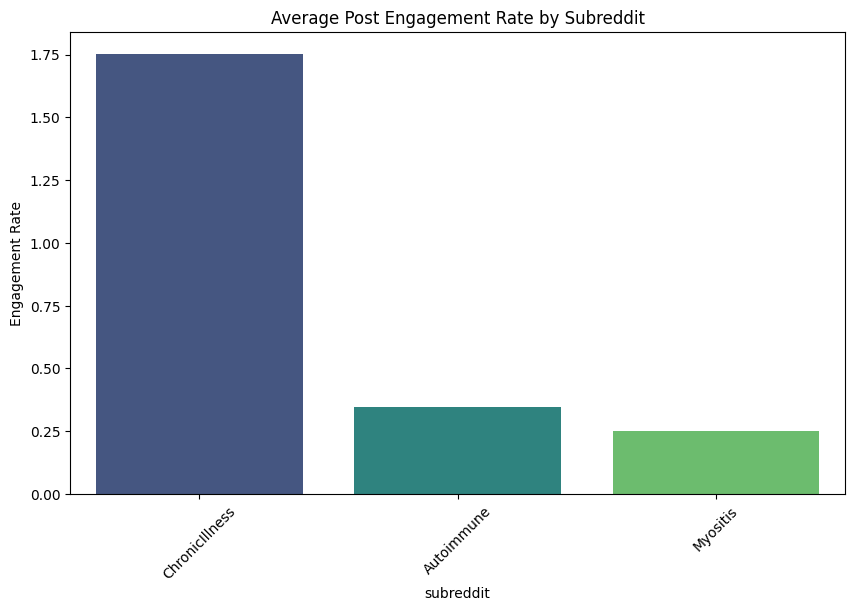

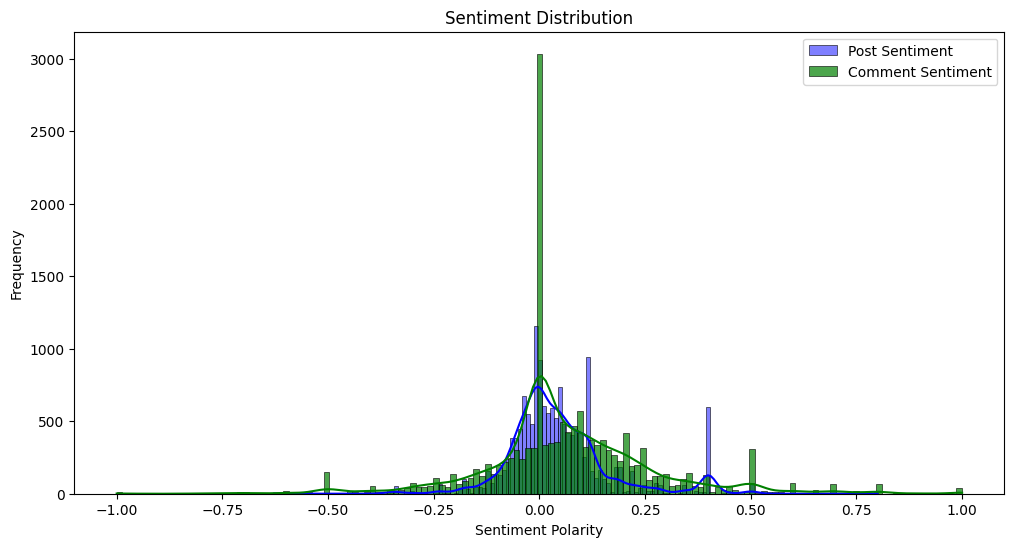

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Engagement by subreddit
engagement_by_subreddit = df.groupby('subreddit')['post_engagement_rate'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=engagement_by_subreddit.index, y=engagement_by_subreddit.values, palette="viridis")
plt.title("Average Post Engagement Rate by Subreddit")
plt.ylabel("Engagement Rate")
plt.xticks(rotation=45)
plt.show()

# Sentiment distribution for posts and comments
plt.figure(figsize=(12, 6))
sns.histplot(df['post_sentiment'], kde=True, color='blue', label='Post Sentiment')
sns.histplot(df['comment_sentiment'], kde=True, color='green', label='Comment Sentiment', alpha=0.7)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


<ipython-input-90-a2c8dd6e442c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_authors, x='total_engagement', y='post_author', palette='viridis')


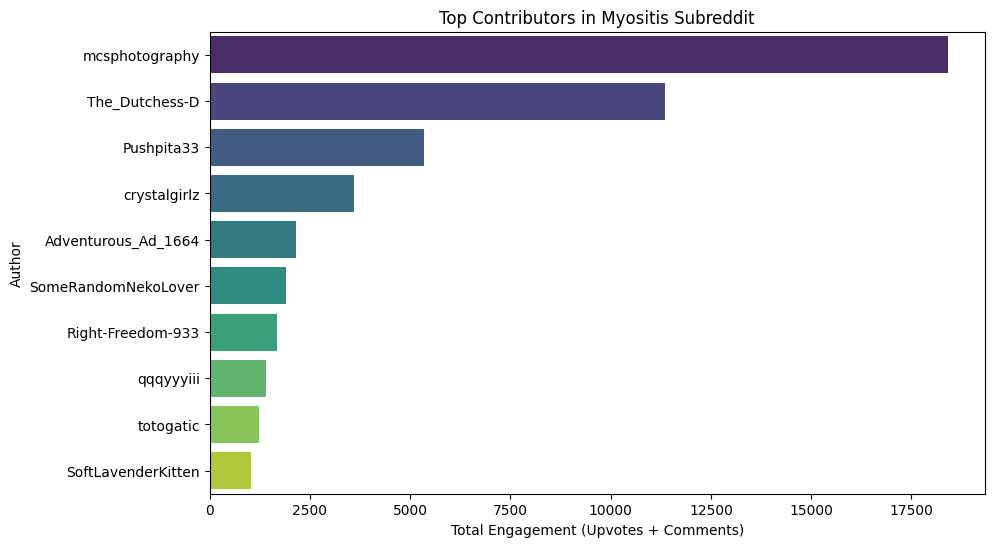

In [90]:
# Filter for Myositis posts
myositis_data = df[df['subreddit'] == 'Myositis']

# Calculate total engagement by author
top_authors = myositis_data.groupby('post_author').agg({
    'post_upvotes': 'sum',
    'post_comments_count': 'sum'
}).reset_index()

# Add a total engagement column
top_authors['total_engagement'] = top_authors['post_upvotes'] + top_authors['post_comments_count']

# Get top 10 authors by total engagement
top_authors = top_authors.sort_values(by='total_engagement', ascending=False).head(10)

# Visualize top contributors
plt.figure(figsize=(10, 6))
sns.barplot(data=top_authors, x='total_engagement', y='post_author', palette='viridis')
plt.title("Top Contributors in Myositis Subreddit")
plt.xlabel("Total Engagement (Upvotes + Comments)")
plt.ylabel("Author")
plt.show()


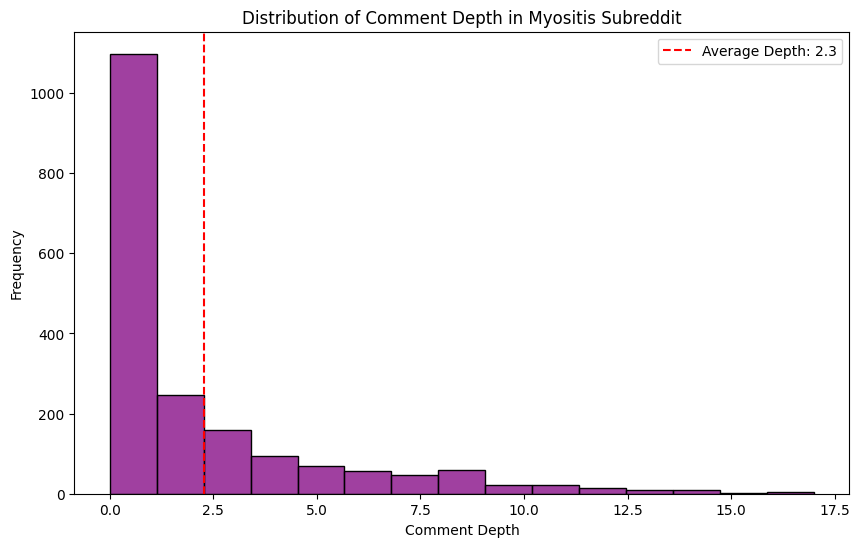

In [92]:
# Filter for Myositis comments
myositis_comments = df[df['subreddit'] == 'Myositis']

# Average comment depth
avg_comment_depth = myositis_comments['comment_depth'].mean()

# Plot distribution of comment depth
plt.figure(figsize=(10, 6))
sns.histplot(myositis_comments['comment_depth'], kde=False, bins=15, color='purple')
plt.title("Distribution of Comment Depth in Myositis Subreddit")
plt.xlabel("Comment Depth")
plt.ylabel("Frequency")
plt.axvline(avg_comment_depth, color='red', linestyle='--', label=f'Average Depth: {avg_comment_depth:.1f}')
plt.legend()
plt.show()


<ipython-input-66-463332b5d7f4>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engagement_by_subreddit.index, y=engagement_by_subreddit.values, palette="viridis")


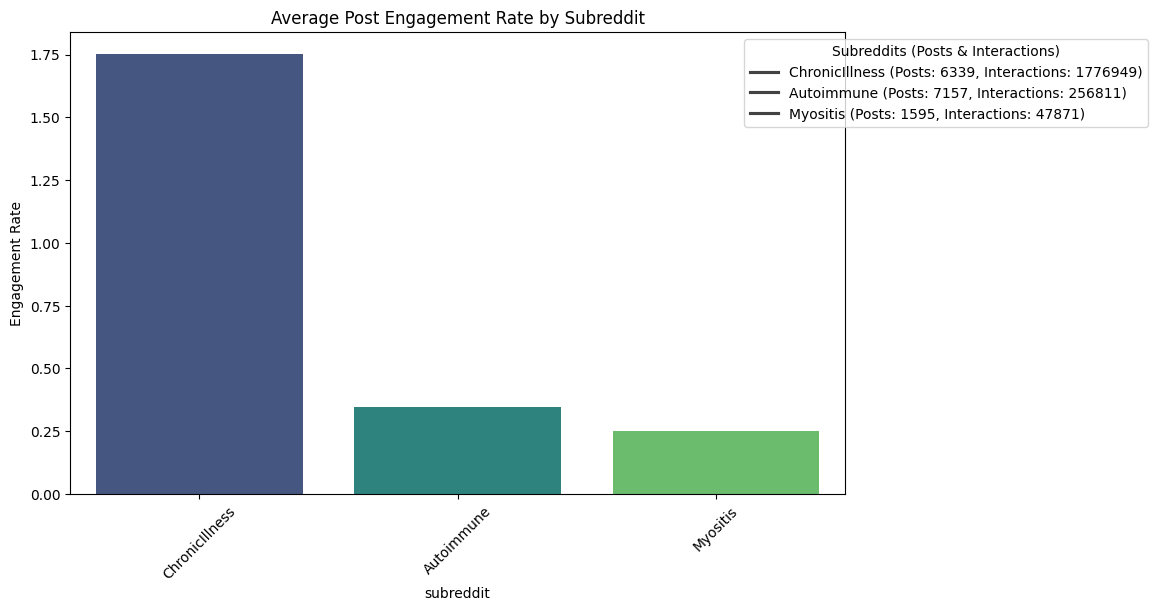

In [66]:
# Group data by subreddit for metrics
engagement_by_subreddit = df.groupby('subreddit')['post_engagement_rate'].mean().sort_values(ascending=False)
posts_by_subreddit = df['subreddit'].value_counts()
interactions_by_subreddit = df.groupby('subreddit')['post_comments_count'].sum() + df.groupby('subreddit')['post_upvotes'].sum()

# Combine into a legend-friendly format
subreddit_labels = [
    f"{sub} (Posts: {posts_by_subreddit[sub]}, Interactions: {int(interactions_by_subreddit[sub])})"
    for sub in engagement_by_subreddit.index
]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=engagement_by_subreddit.index, y=engagement_by_subreddit.values, palette="viridis")

# Add title, labels, and adjust x-ticks
plt.title("Average Post Engagement Rate by Subreddit")
plt.ylabel("Engagement Rate")
plt.xticks(rotation=45)

# Add legend
plt.legend(subreddit_labels, title="Subreddits (Posts & Interactions)", loc="upper right", bbox_to_anchor=(1.4, 1.0))

plt.show()


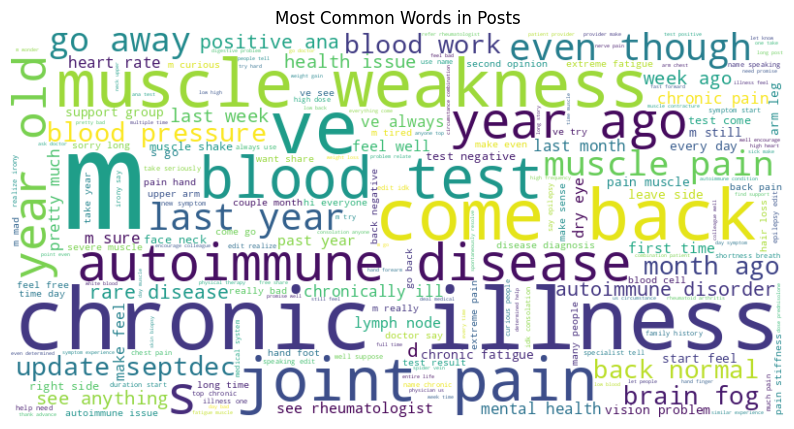

In [60]:
from wordcloud import WordCloud

# Generate a word cloud for posts
post_text = " ".join(df['post_lemmas'].apply(' '.join))
post_wordcloud = WordCloud(background_color='white', max_words=200, width=800, height=400).generate(post_text)

plt.figure(figsize=(10, 6))
plt.imshow(post_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Posts")
plt.show()


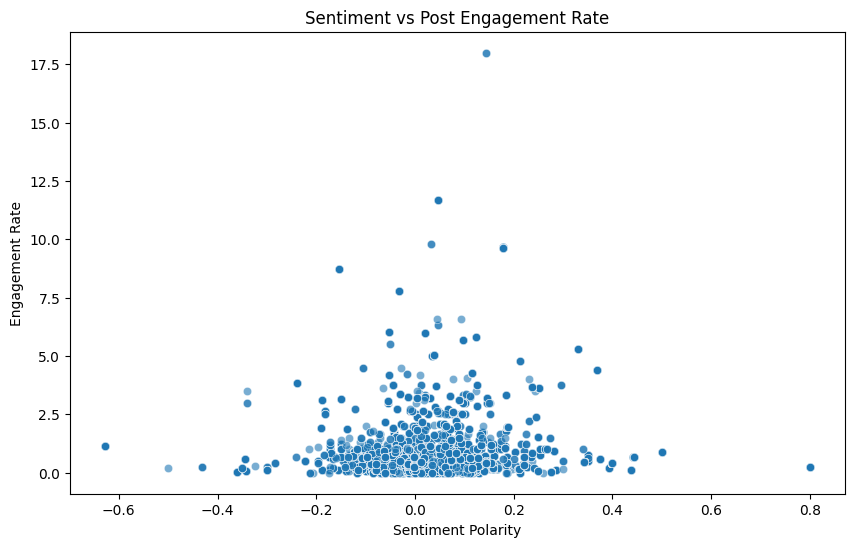

Correlation between Sentiment and Engagement Rate:
                      post_sentiment  post_engagement_rate
post_sentiment              1.000000              0.011685
post_engagement_rate        0.011685              1.000000


In [61]:
# Scatter plot: Sentiment vs Engagement
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['post_sentiment'], y=df['post_engagement_rate'], alpha=0.6)
plt.title("Sentiment vs Post Engagement Rate")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Engagement Rate")
plt.show()

# Compute correlation
correlation = df[['post_sentiment', 'post_engagement_rate']].corr()
print("Correlation between Sentiment and Engagement Rate:")
print(correlation)


<ipython-input-62-21c9391ee1f2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_by_subreddit, x='subreddit', y='post_sentiment', palette='coolwarm')


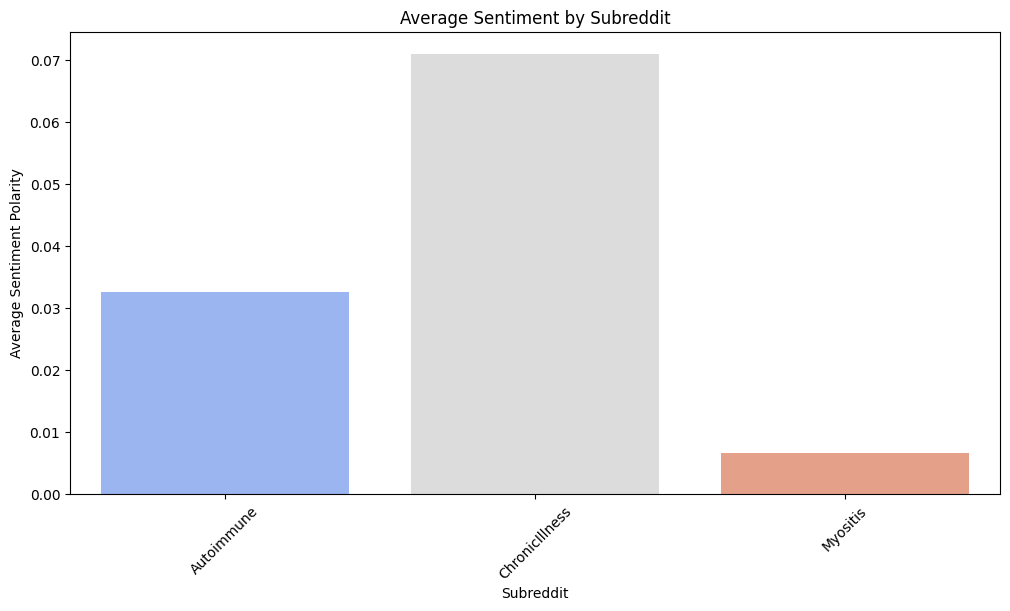

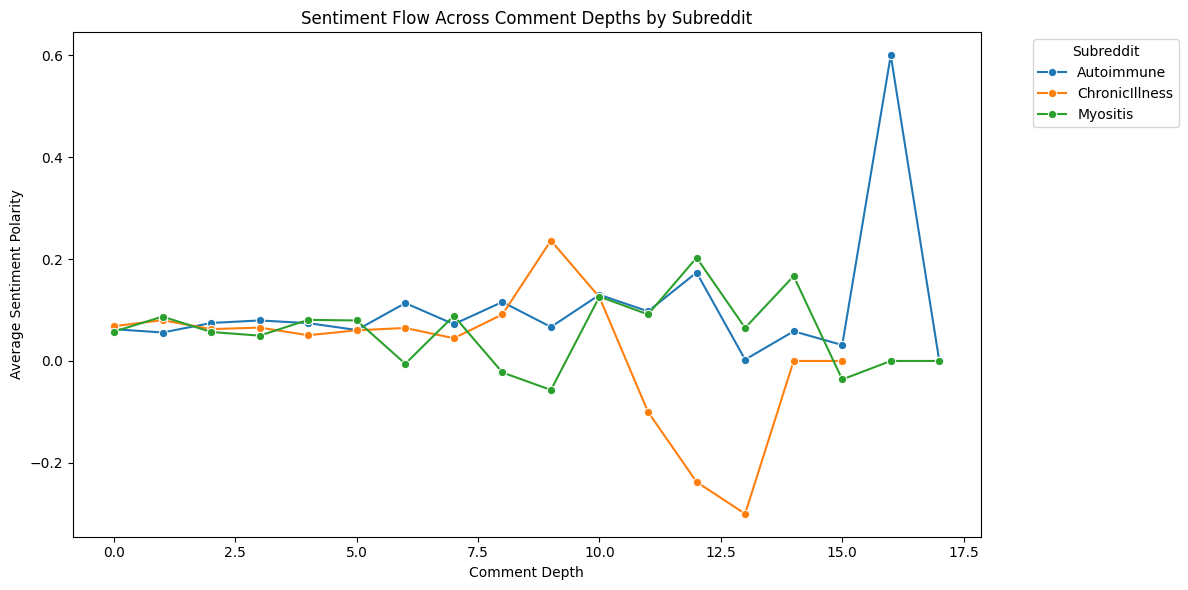

In [62]:
# Aggregate sentiment by subreddit
sentiment_by_subreddit = df.groupby('subreddit')['post_sentiment'].mean().reset_index()

# Visualize sentiment flow
plt.figure(figsize=(12, 6))
sns.barplot(data=sentiment_by_subreddit, x='subreddit', y='post_sentiment', palette='coolwarm')
plt.title("Average Sentiment by Subreddit")
plt.xlabel("Subreddit")
plt.ylabel("Average Sentiment Polarity")
plt.xticks(rotation=45)
plt.show()

# Sentiment flow per subreddit and their comments
subreddit_sentiment_flow = df.groupby(['subreddit', 'comment_depth'])['comment_sentiment'].mean().reset_index()

# Visualize sentiment across comment depths
plt.figure(figsize=(12, 6))
sns.lineplot(data=subreddit_sentiment_flow, x='comment_depth', y='comment_sentiment', hue='subreddit', marker='o')
plt.title("Sentiment Flow Across Comment Depths by Subreddit")
plt.xlabel("Comment Depth")
plt.ylabel("Average Sentiment Polarity")
plt.legend(title="Subreddit", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-63-22bc192d256b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_contributors, x='total_engagement', y='post_author', palette='viridis')


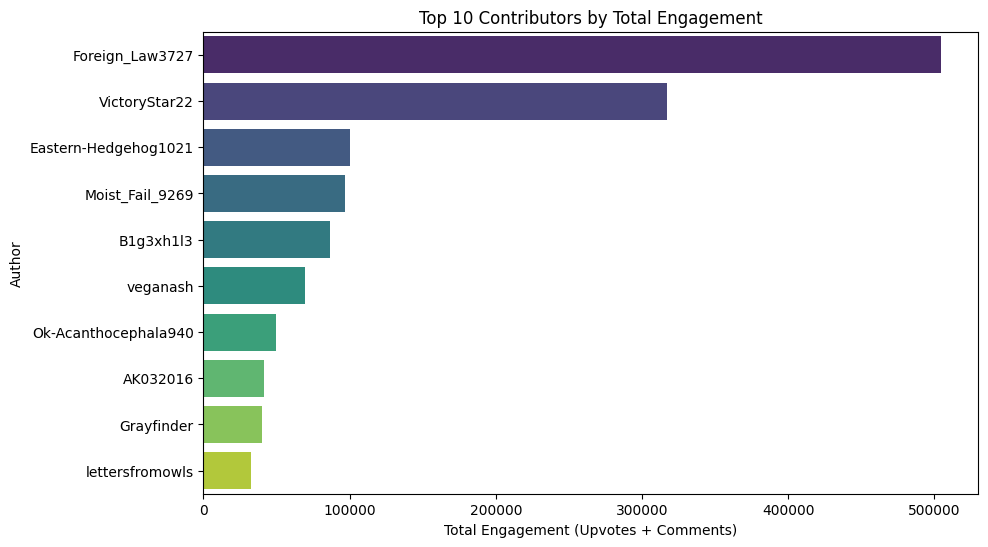

In [63]:
# Calculate total engagement (upvotes + comment counts) by author
top_contributors = df.groupby('post_author').agg({
    'post_upvotes': 'sum',
    'post_comments_count': 'sum'
}).reset_index()

# Add a total engagement column
top_contributors['total_engagement'] = top_contributors['post_upvotes'] + top_contributors['post_comments_count']

# Sort by total engagement and take the top 10
top_contributors = top_contributors.sort_values(by='total_engagement', ascending=False).head(10)

# Visualize top contributors
plt.figure(figsize=(10, 6))
sns.barplot(data=top_contributors, x='total_engagement', y='post_author', palette='viridis')
plt.title("Top 10 Contributors by Total Engagement")
plt.xlabel("Total Engagement (Upvotes + Comments)")
plt.ylabel("Author")
plt.show()


In [64]:
# Calculate total interaction score for each post
df['total_interactions'] = df['post_upvotes'] + df['post_comments_count']

# Find the post with the highest interactions
most_interacted_post = df.loc[df['total_interactions'].idxmax()]

# Display details of the most interacted post
print("Post with Most Interactions:")
print(f"Title: {most_interacted_post['post_title']}")
print(f"Content: {most_interacted_post['post_content']}")
print(f"Upvotes: {most_interacted_post['post_upvotes']}")
print(f"Comments: {most_interacted_post['post_comments_count']}")
print(f"Total Interactions: {most_interacted_post['total_interactions']}")
print(f"Subreddit: {most_interacted_post['subreddit']}")
print(f"URL: {most_interacted_post['post_url']}")



Post with Most Interactions:
Title: What chronic illness does everyone have?
Content: i suppose im curious why people dont name their chronic illness i too have one but ive always used its name while speaking about it

edit i realize the irony of what i said i have epilepsy 

edit 2 idk if its any consolation to anyone but on top of my chronic illness im also a physician in the us this circumstance combination of being a patient and a provider makes me even more determined to help those who need to the most i promise to do better and to encourage my colleagues to better 
Upvotes: 251
Comments: 596
Total Interactions: 847
Subreddit: ChronicIllness
URL: https://www.reddit.com/r/ChronicIllness/comments/1an0qtk/what_chronic_illness_does_everyone_have/


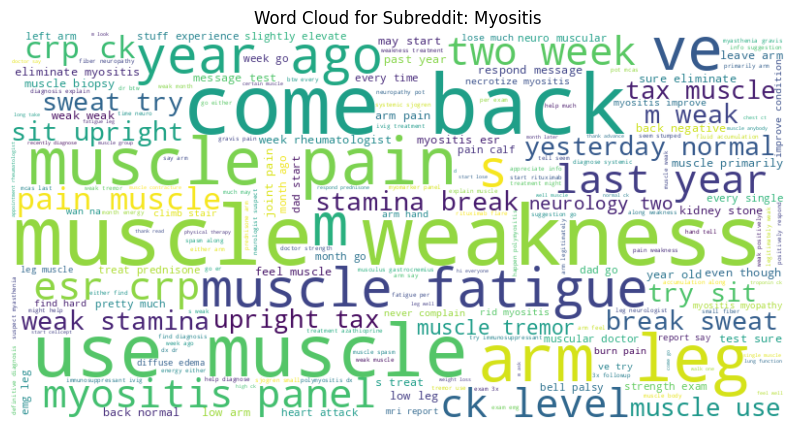

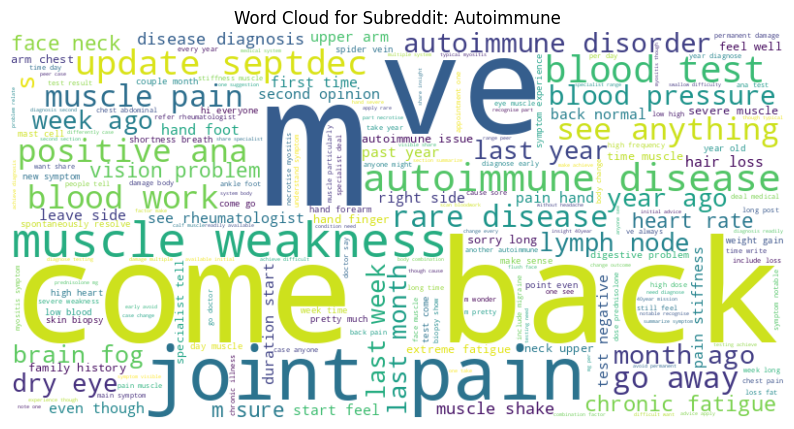

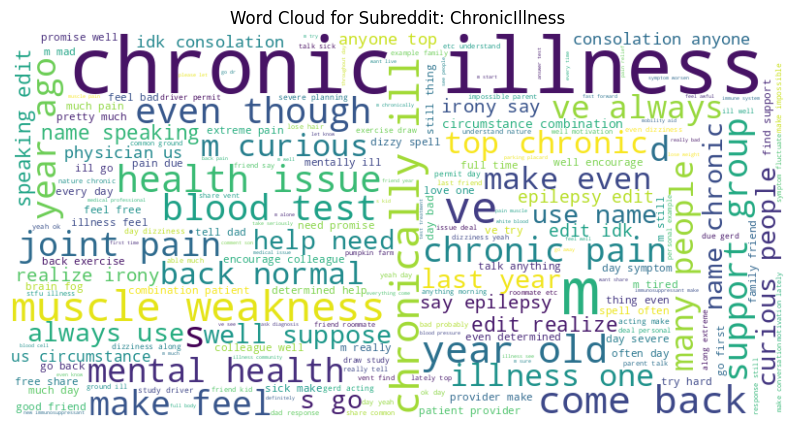

In [65]:
from wordcloud import WordCloud

# Generate word clouds for each subreddit
subreddits = df['subreddit'].unique()

for subreddit in subreddits:
    subreddit_text = " ".join(df[df['subreddit'] == subreddit]['post_lemmas'].apply(' '.join))
    wordcloud = WordCloud(background_color='white', max_words=200, width=800, height=400).generate(subreddit_text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Subreddit: {subreddit}")
    plt.show()


In [84]:
df.columns